<a href="https://colab.research.google.com/github/sherkhan15/Forest-Cover-Normalized-UnNormalized-Predictor-with-ANN/blob/master/Unnormalized_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Information About Dataset**

This dataset contains tree observations from four areas of the Roosevelt National Forest in Colorado. All observations are cartographic variables (no remote sensing) from 30 meter x 30 meter sections of forest. There are over half a million measurements total!

## **Content**
This dataset includes information on tree type, shadow coverage, distance to nearby landmarks (roads etcetera), soil type, and local topography.

In [0]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
uploaded = files.upload()

Saving covtype.csv to covtype (1).csv


In [0]:
df=pd.read_csv('covtype.csv',index_col=0)

In [0]:
df.head()

,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Elevation,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24601 entries, 2596 to 2763
Data columns (total 54 columns):
Aspect                                24601 non-null int64
Slope                                 24601 non-null int64
Horizontal_Distance_To_Hydrology      24601 non-null int64
Vertical_Distance_To_Hydrology        24601 non-null int64
Horizontal_Distance_To_Roadways       24601 non-null int64
Hillshade_9am                         24601 non-null int64
Hillshade_Noon                        24601 non-null int64
Hillshade_3pm                         24601 non-null int64
Horizontal_Distance_To_Fire_Points    24601 non-null int64
Wilderness_Area1                      24601 non-null int64
Wilderness_Area2                      24601 non-null int64
Wilderness_Area3                      24601 non-null int64
Wilderness_Area4                      24601 non-null int64
Soil_Type1                            24601 non-null int64
Soil_Type2                            24601 non-null int64
Soil

In [0]:
df.describe()

,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24601.0,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24601.00000,24601.0,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24600.000000,24600.000000,24600.000000,24600.000000,24600.000000,24600.000000,24600.000000,24600.000000,24600.000000,24600.000000,24600.000000,24600.000000
mean,146.639283,14.827974,203.352221,40.981505,2311.056502,214.470916,220.374903,135.870859,2985.953620,0.531604,0.020284,0.258079,0.190033,0.014430,0.025324,0.039104,0.034267,0.006707,0.026422,0.0,0.000041,0.000406,0.087070,0.016503,0.093045,0.019349,0.00687,0.0,0.026137,0.024877,0.029796,0.001870,0.017967,0.000650,0.014024,0.030771,0.016951,0.000041,0.002195,0.000610,0.000366,0.232226,0.083618,0.013496,0.028049,0.025041,0.000894,0.004146,0.000407,0.001382,0.029593,0.026707,0.018659,3.191667
std,110.684207,8.363665,184.419302,52.876991,1717.492294,28.112360,20.457129,39.882718,2188.964917,0.499010,0.140972,0.437587,0.392335,0.119259,0.157111,0.193847,0.181918,0.081623,0.160389,0.0,0.006376,0.020158,0.281943,0.127404,0.290501,0.137751,0.08260,0.0,0.159546,0.155754,0.170026,0.043202,0.132833,0.025495,0.117591,0.172700,0.129089,0.006376,0.046801,0.024686,0.019124,0.422261,0.276820,0.115388,0.165116,0.156252,0.029892,0.064260,0.020158,0.037152,0.169466,0.161230,0.135319,1.910465
min,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,57.000000,8.000000,67.000000,4.000000,960.000000,201.000000,211.000000,115.000000,1026.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,115.000000,13.000000,162.000000,23.000000,1765.000000,221.000000,224.000000,138.000000,2255.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,232.000000,20.000000,295.000000,62.000000,3416.000000,234.000000,234.000000,160.000000,5243.000000

# **EDA**

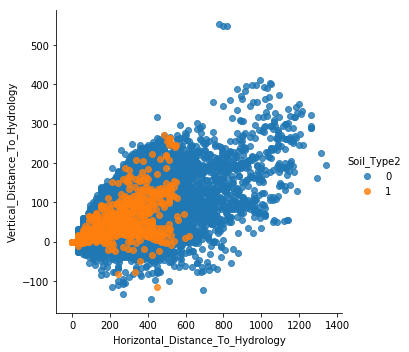

In [0]:
sns.lmplot(x='Horizontal_Distance_To_Hydrology', y='Vertical_Distance_To_Hydrology', data=df, hue='Soil_Type2',fit_reg=False)

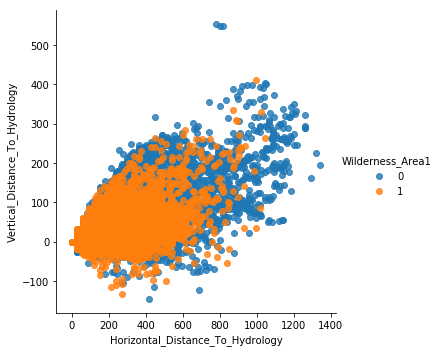

In [0]:
sns.lmplot(x='Horizontal_Distance_To_Hydrology', y='Vertical_Distance_To_Hydrology', data=df, hue='Wilderness_Area1',fit_reg=False)

KeyboardInterrupt: ignored

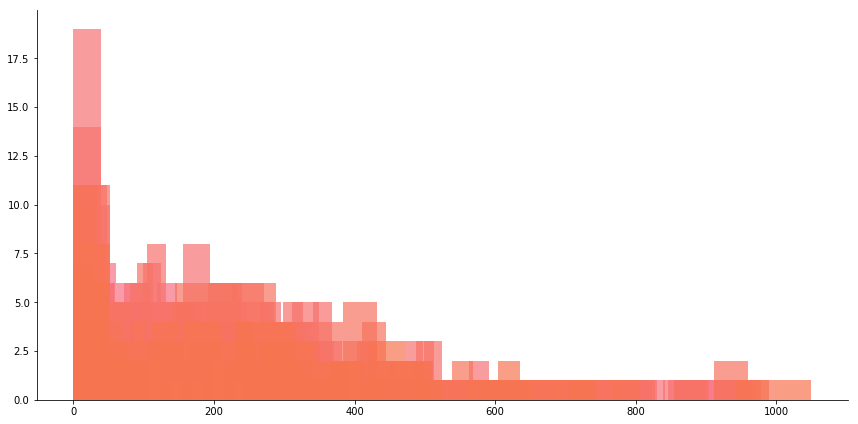

In [0]:
g=sns.FacetGrid(df, hue='Horizontal_Distance_To_Fire_Points',height=6,aspect=2)
g = g.map(plt.hist,'Horizontal_Distance_To_Hydrology',bins=20,alpha=0.7)

'''Using covertype dataset from kaggle to predict forest cover type'''
#Import Tensorflow & Keras

In [0]:

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.python.data import Dataset
import keras
from keras.utils import to_categorical
from keras import models
from keras import layers

Using TensorFlow backend.


*Select predictors* 

In [0]:
x = df[df.columns[:54]]

*target Variable*

In [0]:
y = df.Cover_Type

*Split data into train and test*

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.7, random_state =101)

As 'y' variable is multi class categorical variable, hence using softmax as activation function and sparse-categorical cross entropy as loss function.

# **WITHOUT NORMALIZATION - Using ANN**

In [0]:
model = keras.Sequential([
 keras.layers.Dense(64, activation=tf.nn.relu,                  
 input_shape=(x_train.shape[1],)),
 keras.layers.Dense(64, activation=tf.nn.relu),
 keras.layers.Dense(8, activation='softmax')
 ])

model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history1 = model.fit(
 x_train, y_train,
 epochs= 26, batch_size = 60,
 validation_data=(x_test,y_test))

Train on 17220 samples, validate on 7381 samples
Epoch 1/26
16440/17220 [===========================>..] - ETA: 0s - loss: 12.7042 - acc: 0.2038

InvalidArgumentError: ignored

# WITHOUT NORMALIZATION - Using ANN

In [0]:
from sklearn import preprocessing
df = pd.read_csv('covtype.csv')
x = df[df.columns[:55]]
y = df.Cover_Type
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.7, random_state =110)

In [0]:
train_norm = x_train[x_train.columns[0:10]]
test_norm = x_test[x_test.columns[0:10]]

In [0]:
std_scale = preprocessing.StandardScaler().fit(train_norm)
x_train_norm = std_scale.transform(train_norm)

In [0]:
training_norm_col = pd.DataFrame(x_train_norm, index=train_norm.index, columns=train_norm.columns) 
x_train.update(training_norm_col)
print (x_train.head())

In [0]:
x_test_norm = std_scale.transform(test_norm)
testing_norm_col = pd.DataFrame(x_test_norm, index=test_norm.index, columns=test_norm.columns) 
x_test.update(testing_norm_col)
print (x_train.head())

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


       Elevation    Aspect     Slope  ...  Soil_Type39  Soil_Type40  Cover_Type
23218  -0.034268 -1.076364 -1.170945  ...          0.0          0.0         2.0
23106   0.535440 -0.225254  0.023062  ...          0.0          0.0         2.0
4968   -1.167810 -0.505939  0.739466  ...          0.0          0.0         4.0
16885  -0.750807 -0.623646 -0.812743  ...          0.0          0.0         5.0
880     0.429721 -0.533102 -0.573942  ...          0.0          0.0         2.0

[5 rows x 55 columns]


In [0]:
model = keras.Sequential([
 keras.layers.Dense(64, activation=tf.nn.relu,                  
 input_shape=(x_train.shape[1],)),
 keras.layers.Dense(64, activation=tf.nn.relu),
 keras.layers.Dense(8, activation=  'softmax')
 ])

model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history2 = model.fit(
 x_train, y_train,
 epochs= 26, batch_size = 60,
 validation_data = (x_test, y_test))

Train on 17220 samples, validate on 7381 samples
Epoch 1/26
11940/17220 [===================>..........] - ETA: 0s - loss: 0.7317 - acc: 0.7722

InvalidArgumentError: ignored